<b>Importing Libraries</b>

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from scipy.stats.mstats import winsorize
from scipy.stats import mstats
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error,explained_variance_score
import warnings
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

<b>Loading Dataset</b>

In [26]:
train_data = pd.read_csv("train.csv", sep=',')

test_data = pd.read_csv("test.csv", sep=',')

In [27]:
print('Shape of train data : ',train_data.shape)
print("Shape of test data : ",test_data.shape)

Shape of train data :  (74051, 10)
Shape of test data :  (49368, 9)


In [28]:
#Drop Id column
train_data = train_data.drop('id',axis=1)

# Create a list variable
columns = ['Sex','Length','Diameter','Height','Weight','Shucked Weight','Viscera Weight','Shell Weight']

check details value

In [29]:
#print the head of the train dataset
train_data.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


print info of data

In [30]:
#print the info of train data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74051 entries, 0 to 74050
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             74051 non-null  object 
 1   Length          74051 non-null  float64
 2   Diameter        74051 non-null  float64
 3   Height          74051 non-null  float64
 4   Weight          74051 non-null  float64
 5   Shucked Weight  74051 non-null  float64
 6   Viscera Weight  74051 non-null  float64
 7   Shell Weight    74051 non-null  float64
 8   Age             74051 non-null  int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 5.1+ MB


check overall info

In [31]:
#print the overall info of test data
train_data.describe()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000
mean,1.317460,1.024496,0.348089,23.385217,10.104270,5.058386,6.723870,9.967806
std,0.287757,0.237396,0.092034,12.648153,5.618025,2.792729,3.584372,3.175189
min,0.187500,0.137500,0.000000,0.056699,0.028349,0.042524,0.042524,1.000000
25%,1.150000,0.887500,0.300000,13.437663,5.712424,2.863300,3.968930,8.000000
50%,1.375000,1.075000,0.362500,23.799405,9.908150,4.989512,6.931453,10.000000
75%,1.537500,1.200000,0.412500,32.162508,14.033003,6.988152,9.071840,11.000000
max,2.012815,1.612500,2.825000,80.101512,42.184056,21.545620,28.491248,29.000000


Check for null values

In [32]:
pd.isnull(train_data).sum()

Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Age               0
dtype: int64

In [33]:
#checking unique values in sex column
train_data['Sex'].unique()

array(['I', 'M', 'F'], dtype=object)

In [34]:
#taking count for unique values
count_bysex=train_data['Sex'].value_counts().to_frame(name='Count').sort_values(by=['Count'])
count_bysex

,Count
Sex,
F,23010
I,23957
M,27084


<b>Exploratory Data Analysis (EDA)</b>

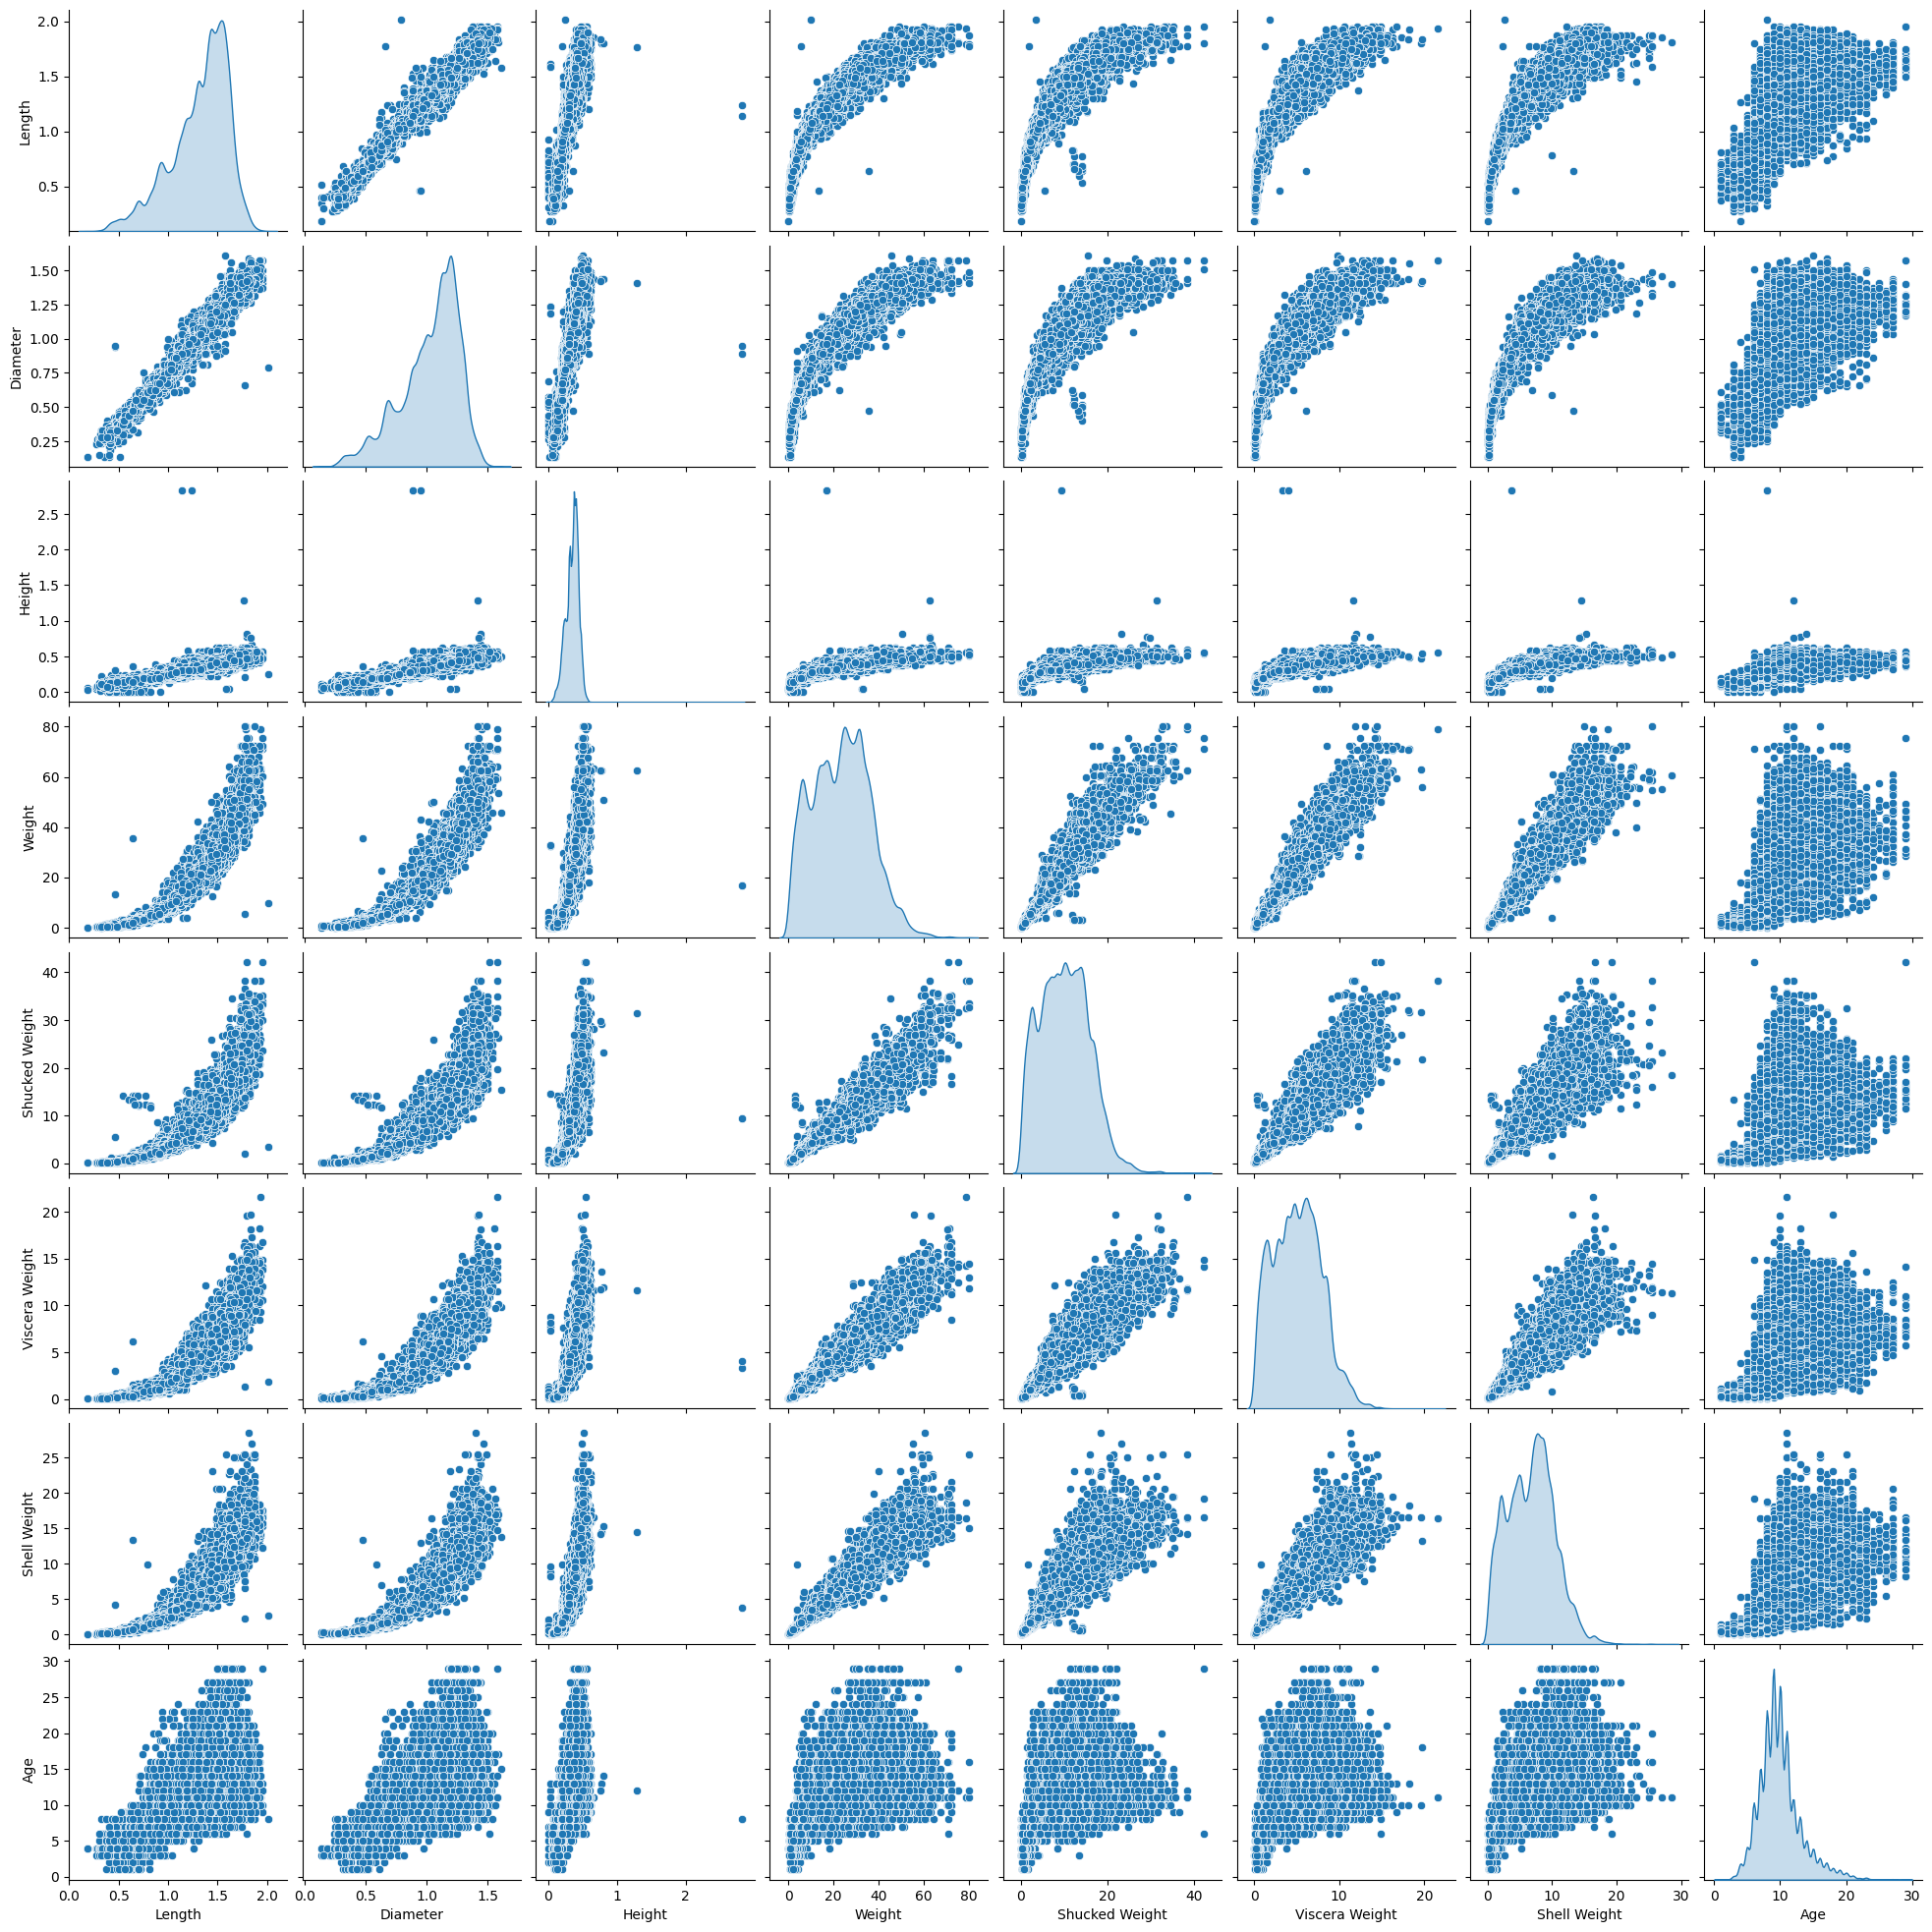

In [35]:
sns.pairplot(data=train_data, diag_kind = 'kde')

Correlation Heatmap

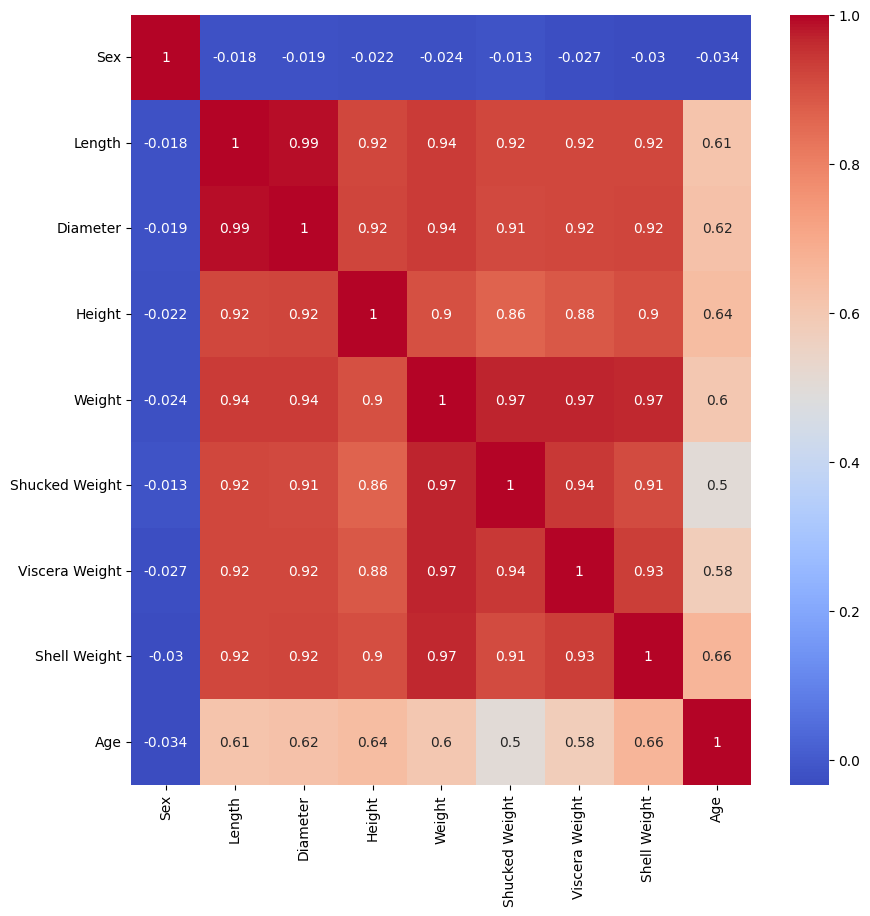

In [36]:
# Apply Label encoding to the sex column
label_encoder = LabelEncoder()
train_data['Sex'] = label_encoder.fit_transform(train_data['Sex'])

# Compute the correlation matrix
corr = train_data.corr()

# Set the figure size
fig, ax = plt.subplots(figsize = (10,10))

# Generate a heatmap 
sns.heatmap(corr,annot=True,cmap='coolwarm',ax = ax)

# Display the heatmap
plt.show()

Dsitribution of Data

C:\Users\phuaw\AppData\Local\Temp\ipykernel_25160\2305823346.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4,3,i)


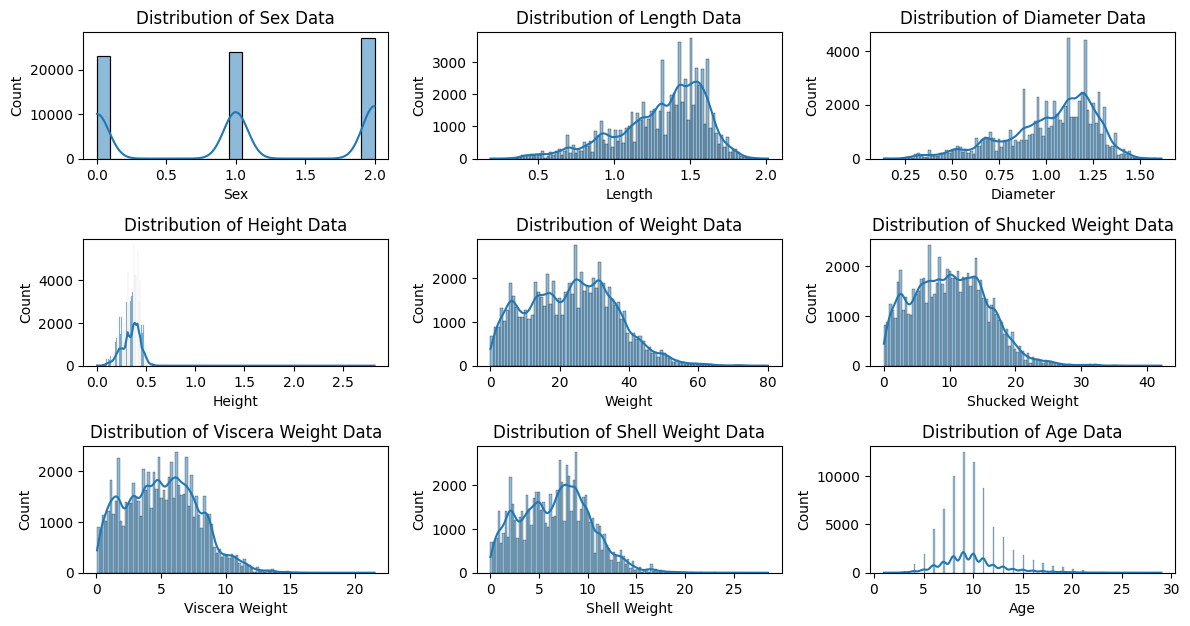

In [37]:
plt.figure(figsize=(12,8))
plt.title("Distribution of feature Data in the Train Dataset")

for i, column in enumerate(train_data.columns,1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of {column} Data")
    sns.histplot(train_data[column], kde = True)
    plt.xlabel(column)
    plt.tight_layout()
    plt.plot()

plt.show()

Box Plot

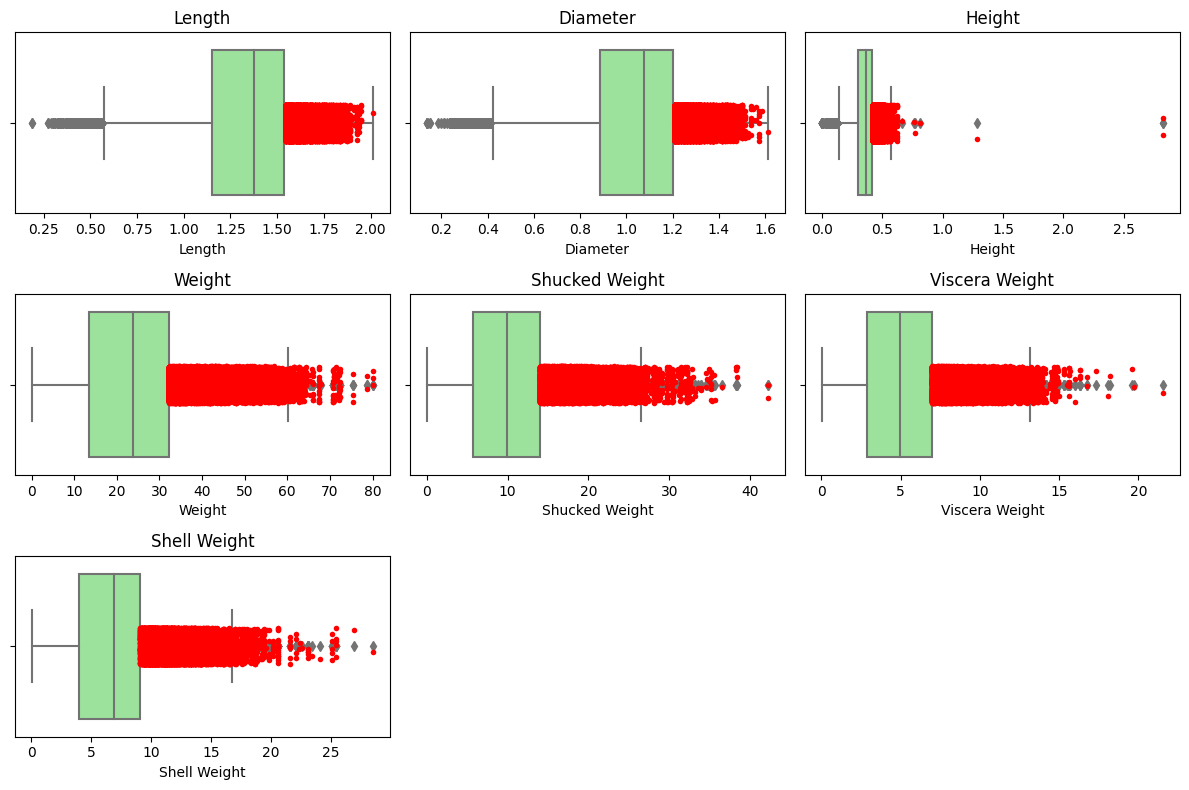

In [38]:
data_selected = train_data[columns]

# Set figure size and layout
fig, axs = plt.subplots(ncols=3, nrows=3, figsize = (12,8))
axs = axs.flatten()

# Loop through each feature(excluding the sex column) and plot its boxplot with outliers highlited

for i, column in enumerate(data_selected.columns[1:]):
    sns.boxplot(x=data_selected[column],ax=axs[i], color='lightgreen')
    sns.stripplot(x=data_selected[column][data_selected[column]>data_selected[column].quantile(0.75)],ax=axs[i],color='red',size=4)
    axs[i].set_title(column)

# Remove extra subplot(s) if any
for ax in axs[len(data_selected.columns)-1:]:
        ax.remove()

#Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

# # Save the plot as a PNG file
# fig.savefig('boxplot1.png', dpi=300, bbox_inches= 'tight')

Data Preprocessing<br>
Removing outliers using winsorization

In [39]:
# Winsorize 'Height' variable
winsorized_height = mstats.winsorize(train_data['Height'], limits=(0.05, 0.05))
train_data['Height'] = winsorized_height

# Winsorize 'Weight' variable
winsorized_weight = mstats.winsorize(train_data['Weight'], limits=(0.05, 0.05))
train_data['Weight'] = winsorized_weight

# Winsorize 'Shucked Weight' variable
winsorized_shuckedWeight = mstats.winsorize(train_data['Shucked Weight'], limits=(0.05, 0.05))
train_data['Shucked Weight'] = winsorized_shuckedWeight

# Winsorize 'Viscera Weight' variable
winsorized_vw = mstats.winsorize(train_data['Viscera Weight'], limits=(0.05, 0.05))
train_data['Viscera Weight'] = winsorized_vw

# Winsorize 'Shell Weight' variable
winsorized_shellWeight = mstats.winsorize(train_data['Shell Weight'], limits=(0.05, 0.05))
train_data['Shell Weight'] = winsorized_shellWeight

In [40]:
# Remove outliers based on specific conditions
train_data = train_data.drop(train_data[train_data['Length'] < 0.35].index)
train_data = train_data.drop(train_data[train_data['Diameter'] < 0.2].index)
train_data = train_data.drop(train_data[train_data['Height'] > 1.2].index)
train_data = train_data.drop(train_data[train_data['Weight'] > 70].index)
train_data = train_data.drop(train_data[train_data['Shucked Weight'] > 40].index)
train_data = train_data.drop(train_data[train_data['Viscera Weight'] > 18].index)
train_data = train_data.drop(train_data[train_data['Shell Weight'] > 25].index)

In [41]:
# Separate the features and target variable
X = train_data.drop('Age', axis=1)
y = train_data['Age']

# Split the train_data into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
# Normalize the features using StandardScaler
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_val = scaler.fit_transform(X_val)

In [43]:
# Print head of scaled training set
print('\n','\033[1mStandardardization on Training set'.center(95))
X_train = pd.DataFrame(X_train, columns = X.columns)
X_train.head()


                              Standardardization on Training set                            


,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
0,-1.287912,-0.454201,-0.368265,-0.433063,-0.730409,-0.855439,-0.693901,-0.548551
1,1.150251,0.898966,1.111472,0.772311,1.279607,0.735615,1.812488,1.820652
2,-1.287912,-0.978007,-0.896743,-1.035750,-1.088701,-0.961147,-1.024831,-1.140852
3,-1.287912,0.637063,0.424452,0.018952,0.049472,0.095941,0.005935,0.001442
4,-0.068831,-1.370862,-1.266677,-1.487766,-1.389666,-1.299958,-1.420862,-1.420079


<b>Model Buidling</b><br>
Linear Regression

In [60]:
# Create a linear regression model
model_lr = LinearRegression()

# Fit the model to the training data
model_lr.fit(X_train, y_train)

# Predict the age for the test set
y_pred_lr = model_lr.predict(X_val)

# Evaluate the model
mae = mean_absolute_error(y_val, y_pred_lr)
print('Mean Absolute Error : ',round(mae,5))

# Calculate the explained variance score
evs = explained_variance_score(y_val, y_pred_lr)
print('Explained Variance Score:', evs)

# Calculate the R-squared score
r2 = r2_score(y_val, y_pred_lr)
print('R-squared Score:', r2)

Mean Absolute Error :  1.51759
Explained Variance Score: 0.541002224721481
R-squared Score: 0.5409167356785258


<b>Random Forest</b>

In [62]:
# Create a random forest regression model
model_rf = RandomForestRegressor()

# Fit the model to the training data
model_rf.fit(X_train, y_train)

# Predict the age for the test set
y_pred_rf = model_rf.predict(X_val)

# Evaluate the model
mae = mean_absolute_error(y_val, y_pred_rf)
print('Mean Absolute Error : ',round(mae,5))

# Calculate the explained variance score
evs = explained_variance_score(y_val, y_pred_rf)
print('Explained Variance Score:', evs)

# Calculate the R2 score
r2 = r2_score(y_val,y_pred_rf)
print('R-Squared Score: ',r2)

Mean Absolute Error :  1.50183
Explained Variance Score: 0.5490511387605228
R-Squared Score:  0.5480979383280565


<b>XGBRegressor</b>

In [63]:
# Create an instance of XGBRegressor
xgb = XGBRegressor()

# Fit the model to the training data
xgb.fit(X_train, y_train)

# Predict the target variable for the validation set
pred_XGB = xgb.predict(X_val)

# Calculate the mean absolute error (MAE)
mae = mean_absolute_error(y_val, pred_XGB)
print('Mean Absolute Error: ', round(mae, 5))

# Calculate the explained variance score
evs = explained_variance_score(y_val, pred_XGB)
print('Explained Variance Score:', evs)

# Calculate the r2 score
r2 = r2_score(y_val,pred_XGB)
print("R-squared Score: ",r2)

Mean Absolute Error:  1.43287
Explained Variance Score: 0.5641706187274094
R-squared Score:  0.5634778942713581


<b>Gradient Boosting Regression</b>

In [67]:
# Create the Gradient Boosting Regression model
model_gb = GradientBoostingRegressor()

# Fit the model to the training data
model_gb.fit(X_train, y_train)

# Predict the age for the test set
y_pred_gb = model_gb.predict(X_val)

# Calculate the mean absolute error
mae_gb = mean_absolute_error(y_val, y_pred_gb)
print('Mean Absolute Error:', round(mae_gb, 5))

# Calculate the explained variance score
evs = explained_variance_score(y_val, y_pred_gb)
print('Explained Variance Score:', evs)

# Calculate the R2 score
r2 = r2_score(y_val,y_pred_gb)
print("R-squared score: ",r2)

Mean Absolute Error: 1.43545
Explained Variance Score: 0.5695328592635404
R-squared score:  0.5692211284850466


Epoch 1/10
1851/1851 [==============================] - 9s 4ms/step - loss: 7.4675 - val_loss: 6.6071
Epoch 2/10
1851/1851 [==============================] - 6s 3ms/step - loss: 5.4184 - val_loss: 5.1903
Epoch 3/10
1851/1851 [==============================] - 7s 4ms/step - loss: 5.0229 - val_loss: 5.0994
Epoch 4/10
1851/1851 [==============================] - 7s 4ms/step - loss: 4.8309 - val_loss: 4.9430
Epoch 5/10
1851/1851 [==============================] - 7s 4ms/step - loss: 4.6766 - val_loss: 4.6838
Epoch 6/10
1851/1851 [==============================] - 7s 4ms/step - loss: 4.6322 - val_loss: 4.6954
Epoch 7/10
1851/1851 [==============================] - 8s 4ms/step - loss: 4.5784 - val_loss: 4.6136
Epoch 8/10
1851/1851 [==============================] - 7s 4ms/step - loss: 4.5502 - val_loss: 4.8388
Epoch 9/10
1851/1851 [==============================] - 7s 4ms/step - loss: 4.5178 - val_loss: 4.6488
Epoch 10/10
463/463 [==============================] - 1s 2ms/step
Mean Squared Er

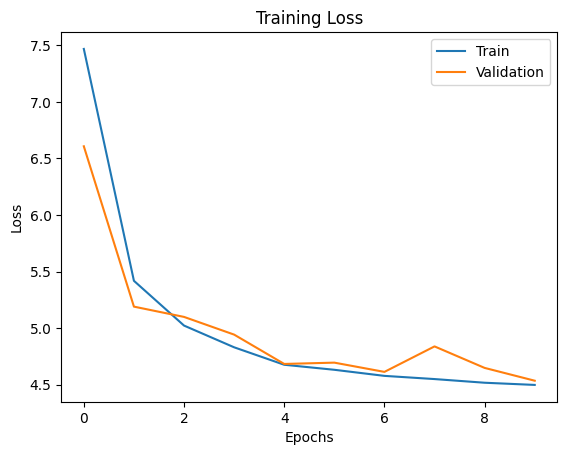

In [90]:
import tensorflow as tf
from tensorflow.keras import regularizers
from sklearn.metrics import mean_squared_error, r2_score

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu',kernel_regularizer=regularizers.l1_l2(l1=0.001,l2=0.001), input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu',kernel_regularizer=regularizers.l1_l2(l1=0.001,l2=0.001)),
    tf.keras.layers.Dense(64, activation='relu',kernel_regularizer=regularizers.l1_l2(l1=0.001,l2=0.001)),
    tf.keras.layers.Dense(128, activation='relu',kernel_regularizer=regularizers.l1_l2(l1=0.001,l2=0.001)),
    tf.keras.layers.Dense(128, activation='relu',kernel_regularizer=regularizers.l1_l2(l1=0.001,l2=0.001)),
    tf.keras.layers.Dense(1, activation = 'relu')
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history=model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model
y_pred = model.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

# Plot the training loss graph
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()